## Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ

Пусть есть события: 
- A - подсудимый виновeн
- B - у подсудимого группая крови с места убийства
    
Мы знаем, что если человек убийца, то у него точно такая группа крови, то есть P(B | A) = 1. Также нам известно, что P(A | $\overline{B}$) = 0, P($\overline{A}$ | $\overline{B}$) = 1 и P(B) = 0.01.  Прокурор пытался оценить P(B | $\overline{A}$), но по факту численно оценил лишь априорные вероятности P(B), то есть вероятность, что в принципе у человека редкая группа крови.  На самом же деле прокурору нужно было оценить P(A | B) = P(B | A) $\times$ P(A) / P(B) = 100 $\times$ P(B).
То есть по факту апостериорная вероятность, что человек виновен, в таком случае просто в 100 раз выше, чем априорная. Но априорная может быть, например, 0.01, тогда апостериорная вероятность, что человек виновен, равна 1%,

## Задание 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ

Адвокат оценил какую-то странную вероятность, равную квадрату P(B). По факту для защиты подсудимого он мог показать несущественность улики, оценив P(B | $\overline{A}$), либо напрямую оценив P($\overline{A}$ | B).
- P($\overline{A}$ | B) = P(B | $\overline{A}$) $\times$ P($\overline{A}$) / P(B) = 1 - P(A) / P(B) (вывели P(B | $\overline{A}$) из формулы полной вероятности для P(B) и все сократили)
- Соответсвенно, если P(A) = 0.001, то P($\overline{A}$ | B) = 0.9

## Задание 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

#### Ответ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
EPS = 1e-9

def posterior(fp, fn, test_positive=True, p_A=0.01):
    if test_positive:
        return (1 - fn) * p_A / ((1 - fn) * p_A + fp * (1 - p_A))
    return fn * p_A / (fn * p_A + (1 - fp) * (1 - p_A))

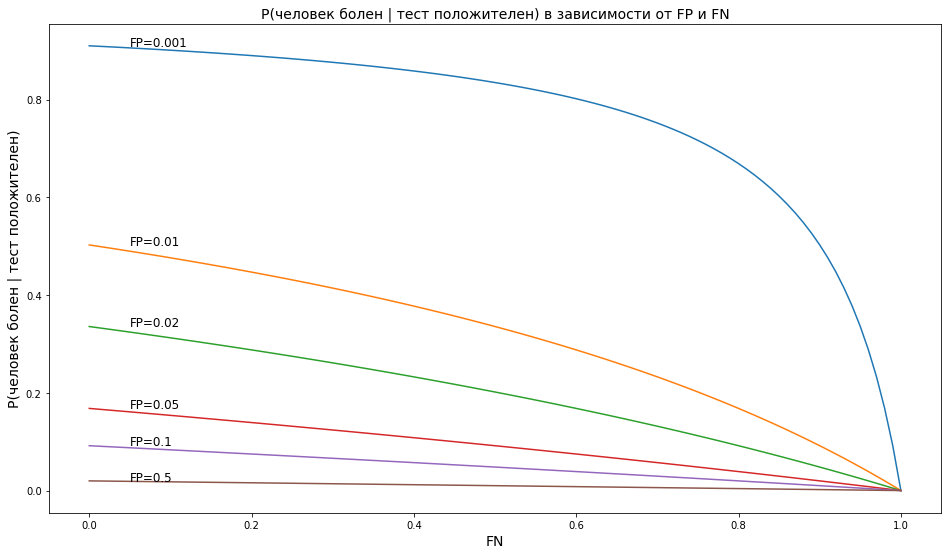

In [3]:
plt.figure(figsize=(16, 9))
for fp in [0.001, 0.01, 0.02, 0.05, 0.1, 0.5]:
    poster = [posterior(fp, fn) for fn in np.linspace(EPS, 1, 101)]
    plt.plot(np.linspace(EPS, 1, 101), poster)
    plt.text(0.05, poster[0], f'FP={fp}', fontsize=12)
plt.title('P(человек болен | тест положителен) в зависимости от FP и FN', fontsize=14)
plt.xlabel('FN', fontsize=14)
plt.ylabel('P(человек болен | тест положителен)',fontsize=14);

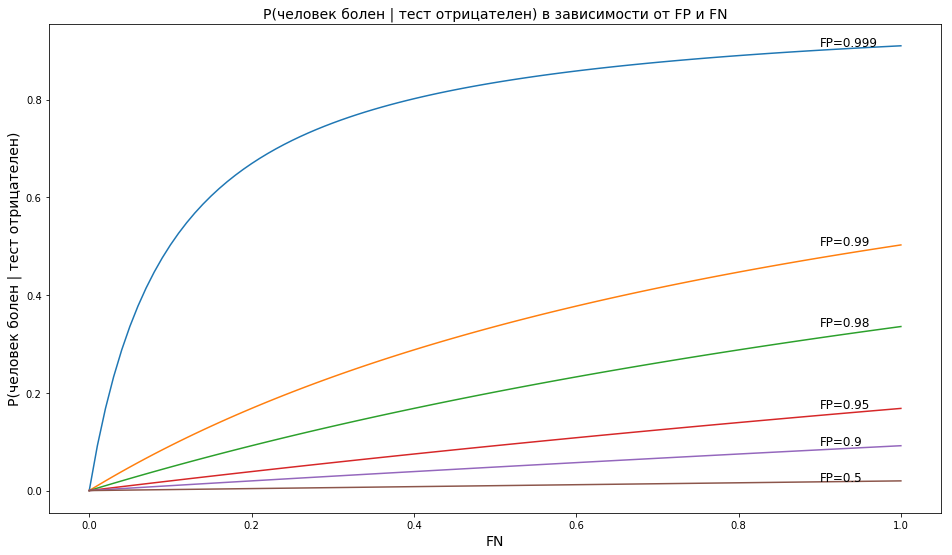

In [4]:
plt.figure(figsize=(16, 9))
for fp in [0.999, 0.99, 0.98, 0.95, 0.9, 0.5]:
    poster = [posterior(fp, fn, test_positive=False) for fn in np.linspace(EPS, 1, 101)]
    plt.plot(np.linspace(EPS, 1, 101), poster)
    plt.text(0.9, poster[-1], f'FP={fp}', fontsize=12)
plt.title('P(человек болен | тест отрицателен) в зависимости от FP и FN', fontsize=14)
plt.xlabel('FN', fontsize=14)
plt.ylabel('P(человек болен | тест отрицателен)',fontsize=14);

In [5]:
fp, fn = np.meshgrid(np.linspace(EPS, 1, 101), np.linspace(EPS, 1, 101))

In [6]:
positive_posteriors = posterior(fp, fn)
negative_posteriors = posterior(fp, fn, test_positive=False)

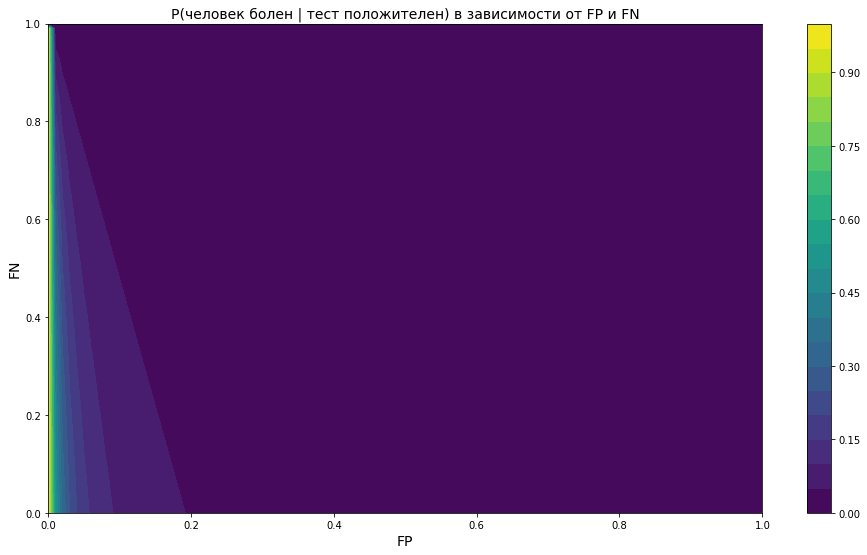

In [7]:
plt.figure(figsize=(16, 9))
plt.contourf(fp, fn, positive_posteriors, 20)
plt.title('P(человек болен | тест положителен) в зависимости от FP и FN', fontsize=14)
plt.xlabel('FP', fontsize=14)
plt.ylabel('FN', fontsize=14)
plt.colorbar();

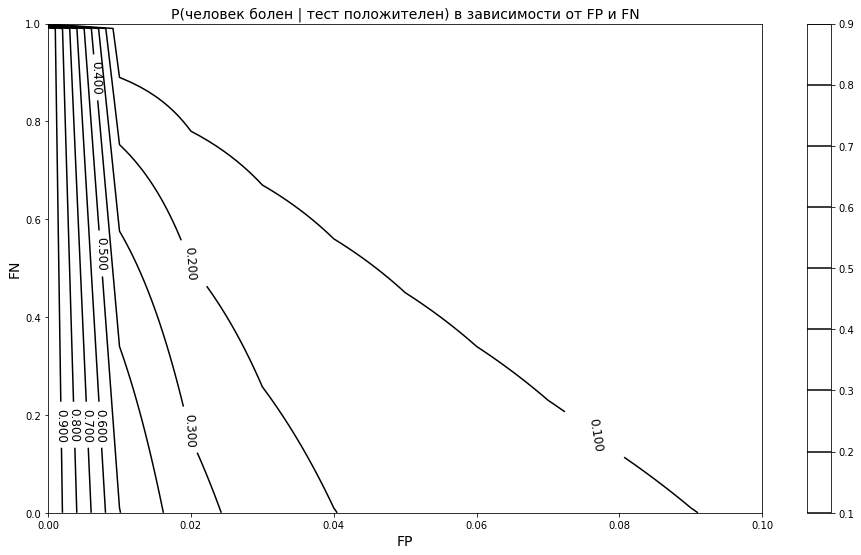

In [8]:
plt.figure(figsize=(16, 9))
contours = plt.contour(fp, fn, positive_posteriors, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=12)
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.title('P(человек болен | тест положителен) в зависимости от FP и FN', fontsize=14)
plt.xlabel('FP', fontsize=14)
plt.ylabel('FN', fontsize=14)
plt.colorbar();

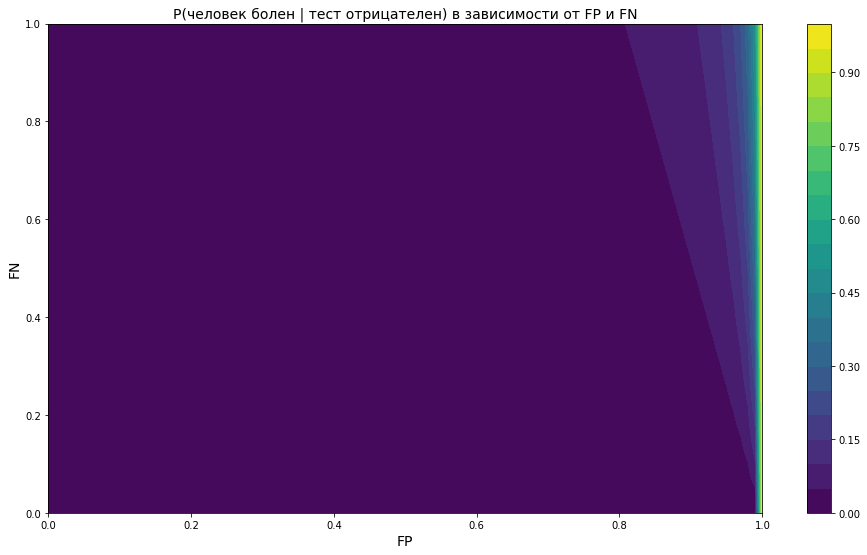

In [9]:
plt.figure(figsize=(16, 9))
plt.contourf(fp, fn, negative_posteriors, 20)
plt.title('P(человек болен | тест отрицателен) в зависимости от FP и FN', fontsize=14)
plt.xlabel('FP', fontsize=14)
plt.ylabel('FN', fontsize=14)
plt.colorbar();

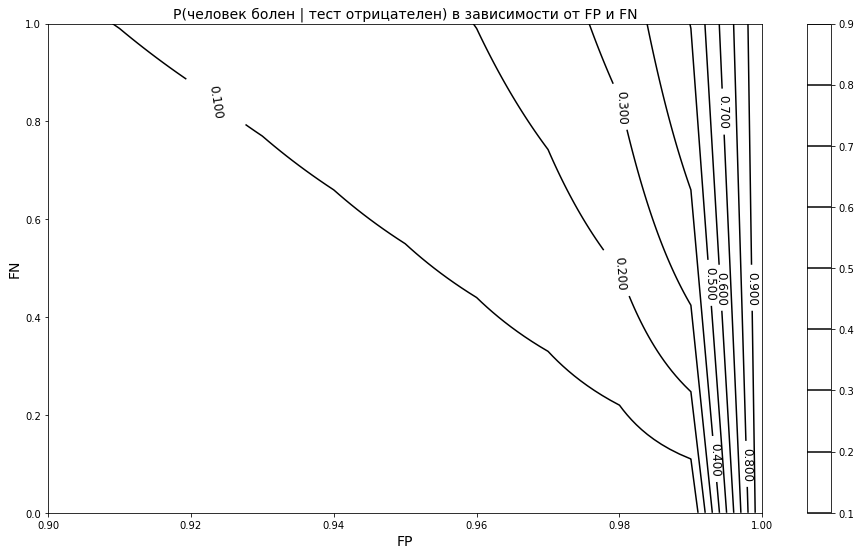

In [10]:
plt.figure(figsize=(16, 9))
contours = plt.contour(fp, fn, negative_posteriors, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=12)
plt.xlim(0.9, 1)
plt.ylim(0, 1)
plt.title('P(человек болен | тест отрицателен) в зависимости от FP и FN', fontsize=14)
plt.xlabel('FP', fontsize=14)
plt.ylabel('FN', fontsize=14)
plt.colorbar();

Видно, что небольшие изменения FP (на 0.01) в низких диапазонах (когда FP в районе 0.01 - 0.05) очень сильно влияют на апостериорную вероятность болезни после положительного теста. FN влияет сильно только при больших значениях FP. Конечно, итоговое решение, на чем сконцентрироваться, сильно зависит от соотношения стоимостей каждой ошибки, но кажется, что снижение FP до уровня, скажем, 0.01 сможет сильно увеличить апостериорную вероятность после положительного теста.